In [ ]:
!pip install numpy
!pip install matplotlib 
!pip install uproot

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [14]:
# Read a PhSp
root_filename = r"output/Seg1_Sim/myIAEA.root"
f = uproot.open(root_filename)

# Look for a single key named "PhaseSpace"
k = f.keys()
psf = f['PhaseSpace']
print('Read PHSP object', psf)
print("PhaseSpace keys: ", psf.keys())

Read PHSP object <TTree 'PhaseSpace' (15 branches) at 0x021d541d8df0>
PhaseSpace keys:  ['AtomicNumber', 'Ekine', 'Weight', 'Mass', 'X', 'Y', 'Z', 'dX', 'dY', 'dZ', 'ParticleName', 'TrackID', 'ParentID', 'EventID', 'RunID']


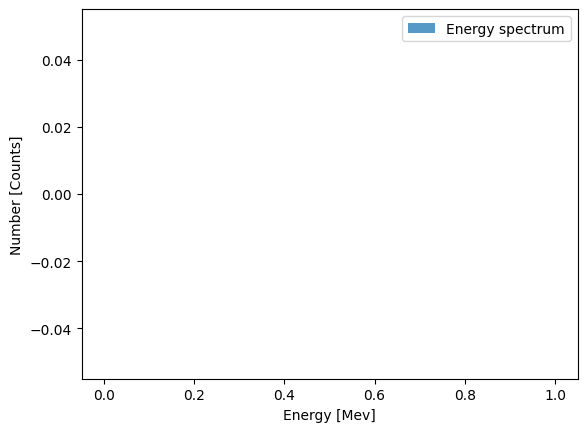

In [21]:
# Plot the E
nbs = 100
x = psf['Ekine']
fig1, ax1 = plt.subplots()
n, bins, patches = ax1.hist(x, nbs, density=False, alpha=0.75, label='Energy spectrum')
ax1.set_xlabel("Energy [Mev]")
ax1.set_ylabel("Number [Counts]")
ax1.legend()

Number of elements:  2319333


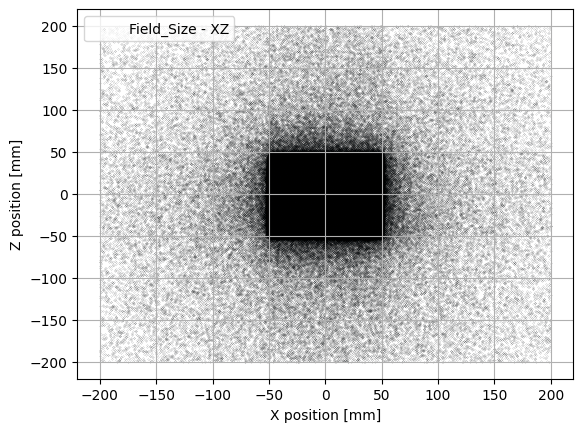

In [16]:
# Plot the X,Y 
x = np.array(psf['X'])
z = np.array(psf['Z'])
e = np.array(psf['Ekine'])
print('Number of elements: ', e.shape[0])
fig2, ax2 = plt.subplots()
ax2.scatter(x, z, linewidths=1, alpha=.7, edgecolor='k', s=0.01, label='Field_Size - XZ')
ax2.set_xlabel("X position [mm]")
ax2.set_ylabel("Z position [mm]")
ax2.legend()
plt.grid(True)
#plt.savefig("output/Field_Size.png", dpi=300)

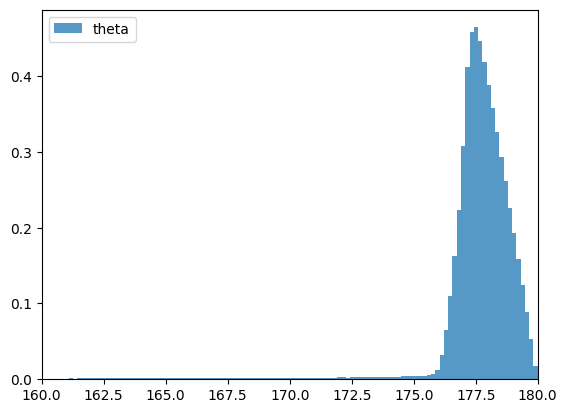

In [18]:
# Plot the theta angle (main direction dY
nbs = 1000
x = np.rad2deg(np.arccos(np.array(psf['dY'])))
fig3, ax3 = plt.subplots()
n, bins, patches = ax3.hist(x, nbs, density=True, alpha=0.75, label='theta')
ax3.set_xlim(160,180)
ax3.legend()

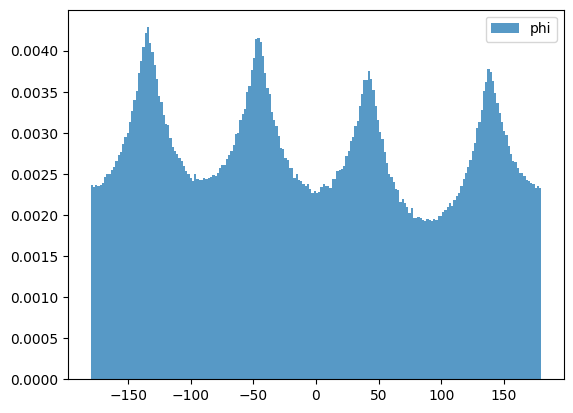

In [19]:
# Plot the phi angle
nbs = 200
x = np.rad2deg(np.arctan2(np.array(psf['dZ']), np.array(psf['dX'])))
fig4, ax4 = plt.subplots()
n, bins, patches = ax4.hist(x, nbs, density=True, alpha=0.75, label='phi')
ax4.legend()